# Worksheet 18

Name: Grace Van Sciver 
UID: U05171982

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

Where does randomness come from?

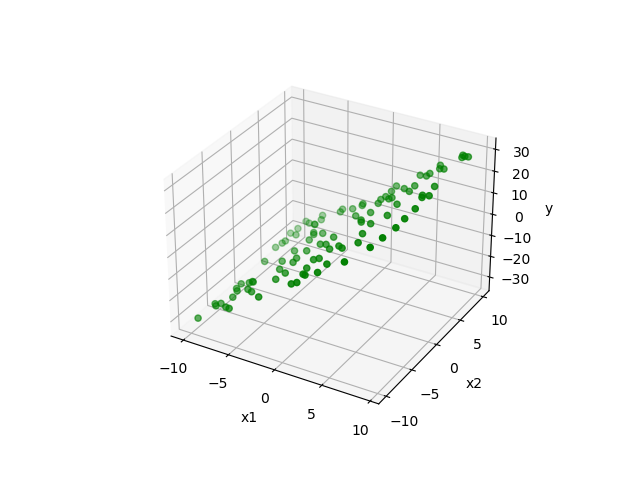

In [13]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

SAMPLE_SIZE = 100

# it's possible for y = 3 * x_1 + (1/4) * x_2
# but we don't know to look for x_2 and we only have x_1 as a feature
x1 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
x2 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = 3 * x1 + (1/4) * x2

# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')

# and plot the point 
ax.scatter(x1 , x2 , y,  color='green')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

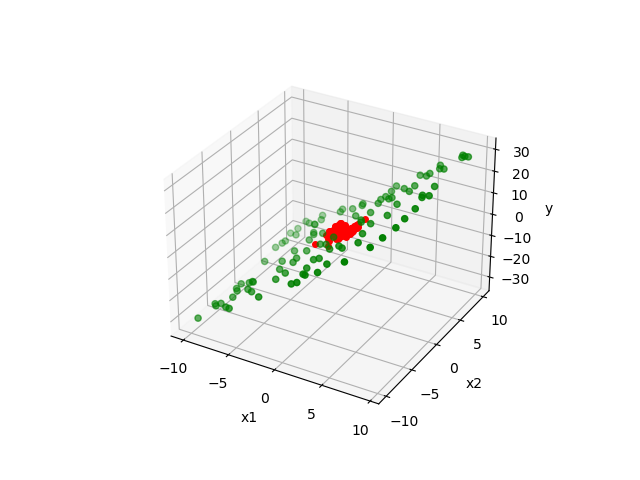

In [14]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([1 , 0.5])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

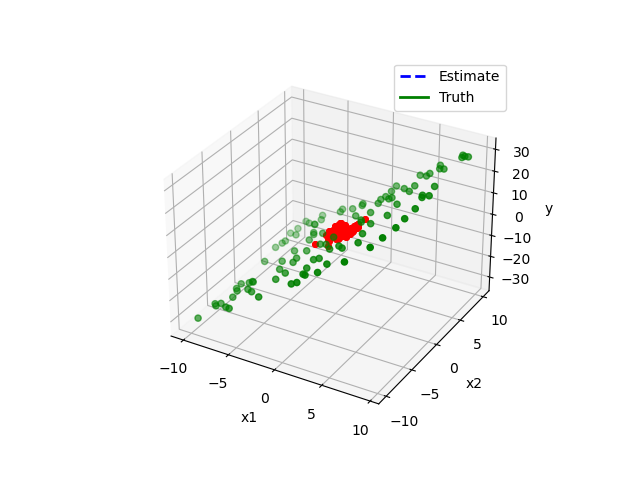

In [15]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

In [7]:
print("True Beta:", true_beta)
print("Estimated Beta:", beta_hat)

True Beta: [1.  0.5]
Estimated Beta: [0.96461514 0.58198472]


The estimate of beta is close to the values we used to generate the data. This shows that the least squares estimation has reasonably captured the relationship in the data. 

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

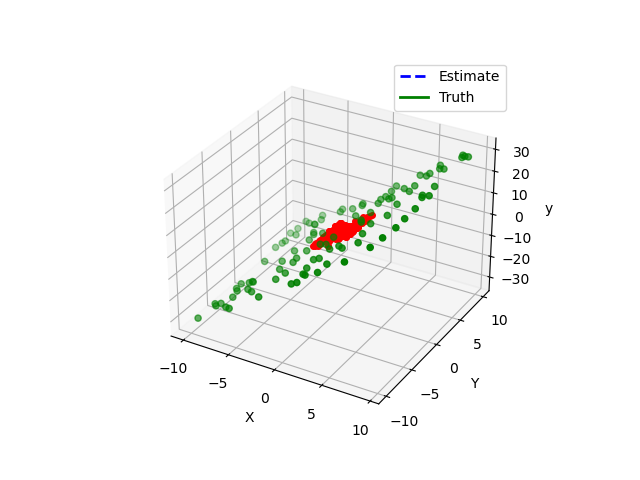

In [16]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100


true_beta = np.array([1, 3, 0.5])

x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)

plt.plot(x, y, 'ro', markersize=4)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

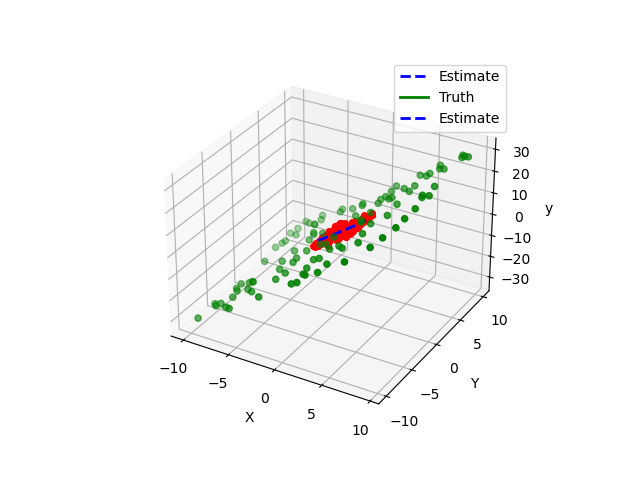

In [17]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([1, 3, 0.5])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x, x**2]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

plt.plot(x, y, 'ro', markersize=4)

x_plot = np.linspace(-1, 1, 100)
y_est = beta_hat[0] + beta_hat[1] * x_plot + beta_hat[2] * x_plot**2
plt.plot(x_plot, y_est, 'b--', lw=2, label='Estimate')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

In [18]:
print("True Beta:", true_beta)
print("Estimated Beta:", beta_hat)

True Beta: [1.  3.  0.5]
Estimated Beta: [1.05360798 2.82670353 0.23872179]


There is more variation between the true beta and estimated beta, but they are still relatively close and mostly capture the underlying relationships in the data. 

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

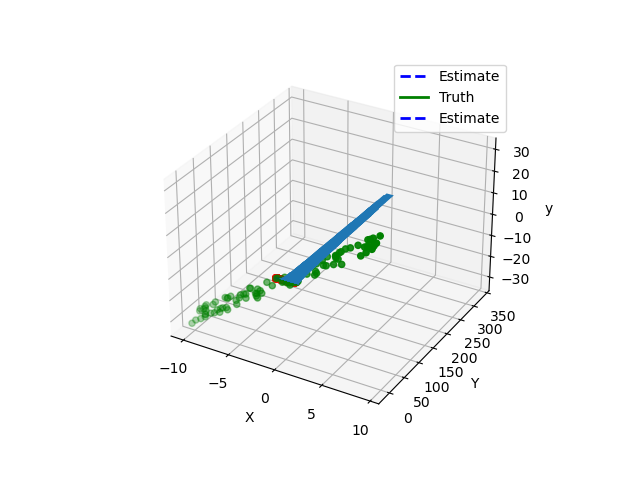

In [21]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([1, 0.5])

for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    betas.append(beta_hat)

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.show()